In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

## 1. 데이터 로드 및 기본 탐색

In [30]:
df = pd.read_csv('creditcard.csv')

print(f"데이터 shape: {df.shape}")
df.info()
print(f"\n컬럼명: {df.columns.tolist()}")
print(f"결측치: {df.isnull().sum().sum()}개")

데이터 shape: (284807, 31)
컬럼명: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
데이터 타입:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
결측치: 0개


In [31]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


정상 거래 (Class=0): 284,315건 (99.83%)
사기 거래 (Class=1): 492건 (0.17%)
불균형 비율: 577.88:1


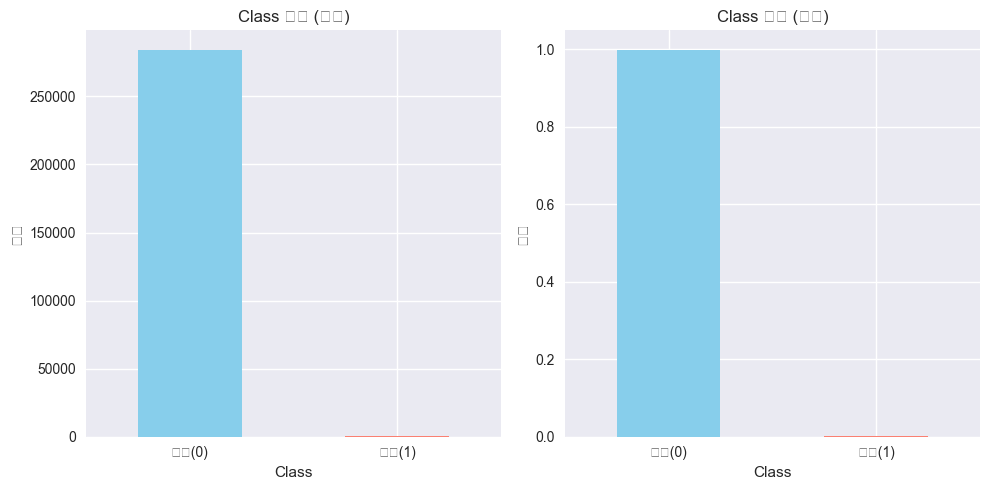

In [33]:
class_counts = df['Class'].value_counts()
class_ratio = df['Class'].value_counts(normalize=True)

print(f"정상 거래 (Class=0): {class_counts[0]:,}건 ({class_ratio[0]*100:.2f}%)")
print(f"사기 거래 (Class=1): {class_counts[1]:,}건 ({class_ratio[1]*100:.2f}%)")
print(f"불균형 비율: {class_counts[0]/class_counts[1]:.2f}:1")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class 분포 (건수)')
plt.xlabel('Class')
plt.ylabel('건수')
plt.xticks([0, 1], ['정상(0)', '사기(1)'], rotation=0)

plt.subplot(1, 2, 2)
class_ratio.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class 분포 (비율)')
plt.xlabel('Class')
plt.ylabel('비율')
plt.xticks([0, 1], ['정상(0)', '사기(1)'], rotation=0)
plt.tight_layout()
plt.show()

## 2. 샘플링

사기 거래 건수: 492건
정상 거래 샘플링 건수: 10,000건
정상 거래 (Class=0): 10,000건 (95.31%)
사기 거래 (Class=1): 492건 (4.69%)
샘플링 후 불균형 비율: 20.33:1


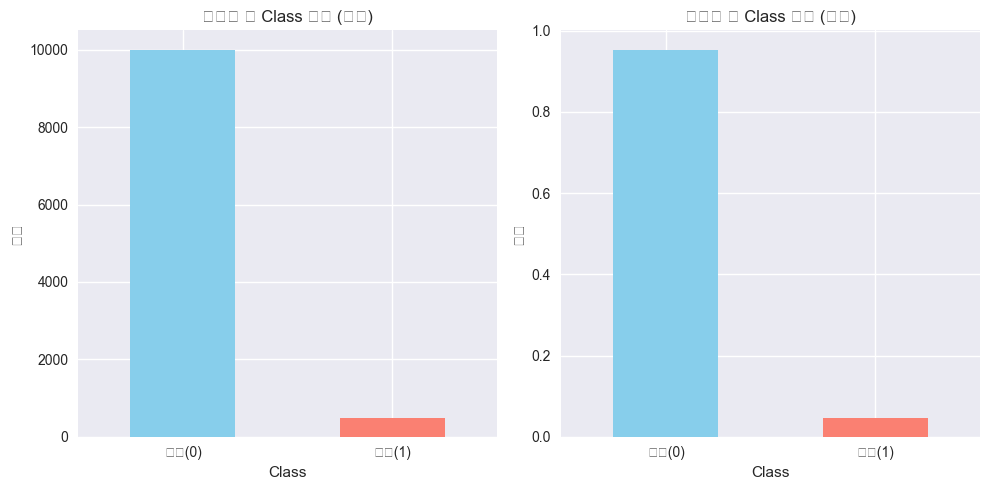

In [34]:
fraud_df = df[df['Class'] == 1].copy()
print(f"사기 거래 건수: {len(fraud_df):,}건")

normal_df = df[df['Class'] == 0].sample(n=10000, random_state=42).copy()
print(f"정상 거래 샘플링 건수: {len(normal_df):,}건")

df_sampled = pd.concat([normal_df, fraud_df], ignore_index=True)

sampled_class_counts = df_sampled['Class'].value_counts()
sampled_class_ratio = df_sampled['Class'].value_counts(normalize=True)

print(f"정상 거래 (Class=0): {sampled_class_counts[0]:,}건 ({sampled_class_ratio[0]*100:.2f}%)")
print(f"사기 거래 (Class=1): {sampled_class_counts[1]:,}건 ({sampled_class_ratio[1]*100:.2f}%)")
print(f"샘플링 후 불균형 비율: {sampled_class_counts[0]/sampled_class_counts[1]:.2f}:1")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sampled_class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('샘플링 후 Class 분포 (건수)')
plt.xlabel('Class')
plt.ylabel('건수')
plt.xticks([0, 1], ['정상(0)', '사기(1)'], rotation=0)

plt.subplot(1, 2, 2)
sampled_class_ratio.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('샘플링 후 Class 분포 (비율)')
plt.xlabel('Class')
plt.ylabel('비율')
plt.xticks([0, 1], ['정상(0)', '사기(1)'], rotation=0)
plt.tight_layout()
plt.show()

## 3. 데이터 전처리

In [35]:
scaler = StandardScaler()
df_sampled['Amount_Scaled'] = scaler.fit_transform(df_sampled[['Amount']])
df_sampled = df_sampled.drop('Amount', axis=1)

print(f"Amount_Scaled 통계:\n{df_sampled['Amount_Scaled'].describe()}")

X = df_sampled.drop('Class', axis=1)
y = df_sampled['Class']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"X 컬럼: {X.columns.tolist()}")

Amount_Scaled 통계:
count    1.049200e+04
mean    -1.354447e-18
std      1.000048e+00
min     -3.946502e-01
25%     -3.722832e-01
50%     -2.999381e-01
75%     -4.335709e-02
max      2.482781e+01
Name: Amount_Scaled, dtype: float64
X shape: (10492, 30)
y shape: (10492,)
X 컬럼: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount_Scaled']


## 4. 학습 데이터와 테스트 데이터 분할

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"학습 데이터 shape: {X_train.shape}")
print(f"테스트 데이터 shape: {X_test.shape}")

train_class_counts = y_train.value_counts()
train_class_ratio = y_train.value_counts(normalize=True)
print(f"학습 데이터 - 정상 거래: {train_class_counts[0]:,}건 ({train_class_ratio[0]*100:.2f}%), 사기 거래: {train_class_counts[1]:,}건 ({train_class_ratio[1]*100:.2f}%)")

test_class_counts = y_test.value_counts()
test_class_ratio = y_test.value_counts(normalize=True)
print(f"테스트 데이터 - 정상 거래: {test_class_counts[0]:,}건 ({test_class_ratio[0]*100:.2f}%), 사기 거래: {test_class_counts[1]:,}건 ({test_class_ratio[1]*100:.2f}%)")

학습 데이터 shape: (8393, 30)
테스트 데이터 shape: (2099, 30)
학습 데이터 - 정상 거래: 7,999건 (95.31%), 사기 거래: 394건 (4.69%)
테스트 데이터 - 정상 거래: 2,001건 (95.33%), 사기 거래: 98건 (4.67%)


## 5. SMOTE 적용

SMOTE를 적용하는 이유: 클래스 불균형 문제로 인해 모델이 다수 클래스(정상 거래)에 편향되어 학습될 수 있습니다. SMOTE는 소수 클래스(사기 거래)의 합성 샘플을 생성하여 모델이 사기 거래 패턴을 더 잘 학습할 수 있도록 하여 Recall과 F1-score를 향상시킵니다.

SMOTE 적용 전 - 사기 거래: 394건, 정상 거래: 7,999건
SMOTE 적용 후 - 사기 거래: 7,999건, 정상 거래: 7,999건
증가한 사기 거래 건수: 7,605건


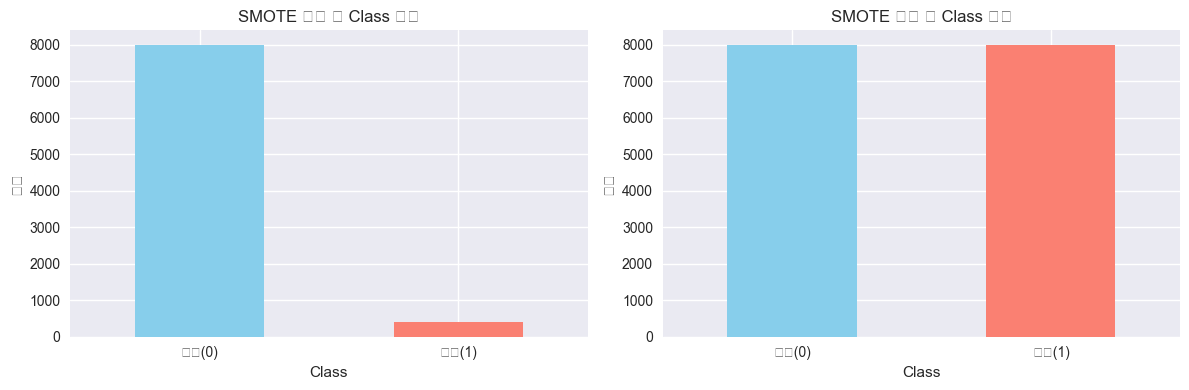

In [37]:
print(f"SMOTE 적용 전 - 사기 거래: {y_train.value_counts()[1]:,}건, 정상 거래: {y_train.value_counts()[0]:,}건")

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"SMOTE 적용 후 - 사기 거래: {y_train_smote.value_counts()[1]:,}건, 정상 거래: {y_train_smote.value_counts()[0]:,}건")
print(f"증가한 사기 거래 건수: {y_train_smote.value_counts()[1] - y_train.value_counts()[1]:,}건")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('SMOTE 적용 전 Class 분포')
plt.xlabel('Class')
plt.ylabel('건수')
plt.xticks([0, 1], ['정상(0)', '사기(1)'], rotation=0)

plt.subplot(1, 2, 2)
y_train_smote.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('SMOTE 적용 후 Class 분포')
plt.xlabel('Class')
plt.ylabel('건수')
plt.xticks([0, 1], ['정상(0)', '사기(1)'], rotation=0)
plt.tight_layout()
plt.show()

## 6. 모델 학습

In [38]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

results = {}
for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    print(classification_report(y_test, y_pred))
    
    pr_auc = average_precision_score(y_test, y_pred_proba[:, 1])
    print(f"PR-AUC: {pr_auc:.4f}")
    
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'pr_auc': pr_auc,
        'f1': f1_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred)
    }


Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2001
           1       0.81      0.93      0.87        98

    accuracy                           0.99      2099
   macro avg       0.90      0.96      0.93      2099
weighted avg       0.99      0.99      0.99      2099

PR-AUC: 0.9508

Random Forest
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2001
           1       0.95      0.89      0.92        98

    accuracy                           0.99      2099
   macro avg       0.97      0.94      0.96      2099
weighted avg       0.99      0.99      0.99      2099

PR-AUC: 0.9537

Gradient Boosting
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2001
           1       0.82      0.91      0.86        98

    accuracy                           0.99      2099
   macro avg       0.91      0.95      0.93

              Model  Precision   Recall  F1-Score   PR-AUC
      Random Forest   0.945652 0.887755  0.915789 0.953747
Logistic Regression   0.812500 0.928571  0.866667 0.950814
  Gradient Boosting   0.816514 0.908163  0.859903 0.944857
                SVM   0.057051 0.540816  0.103213 0.082572


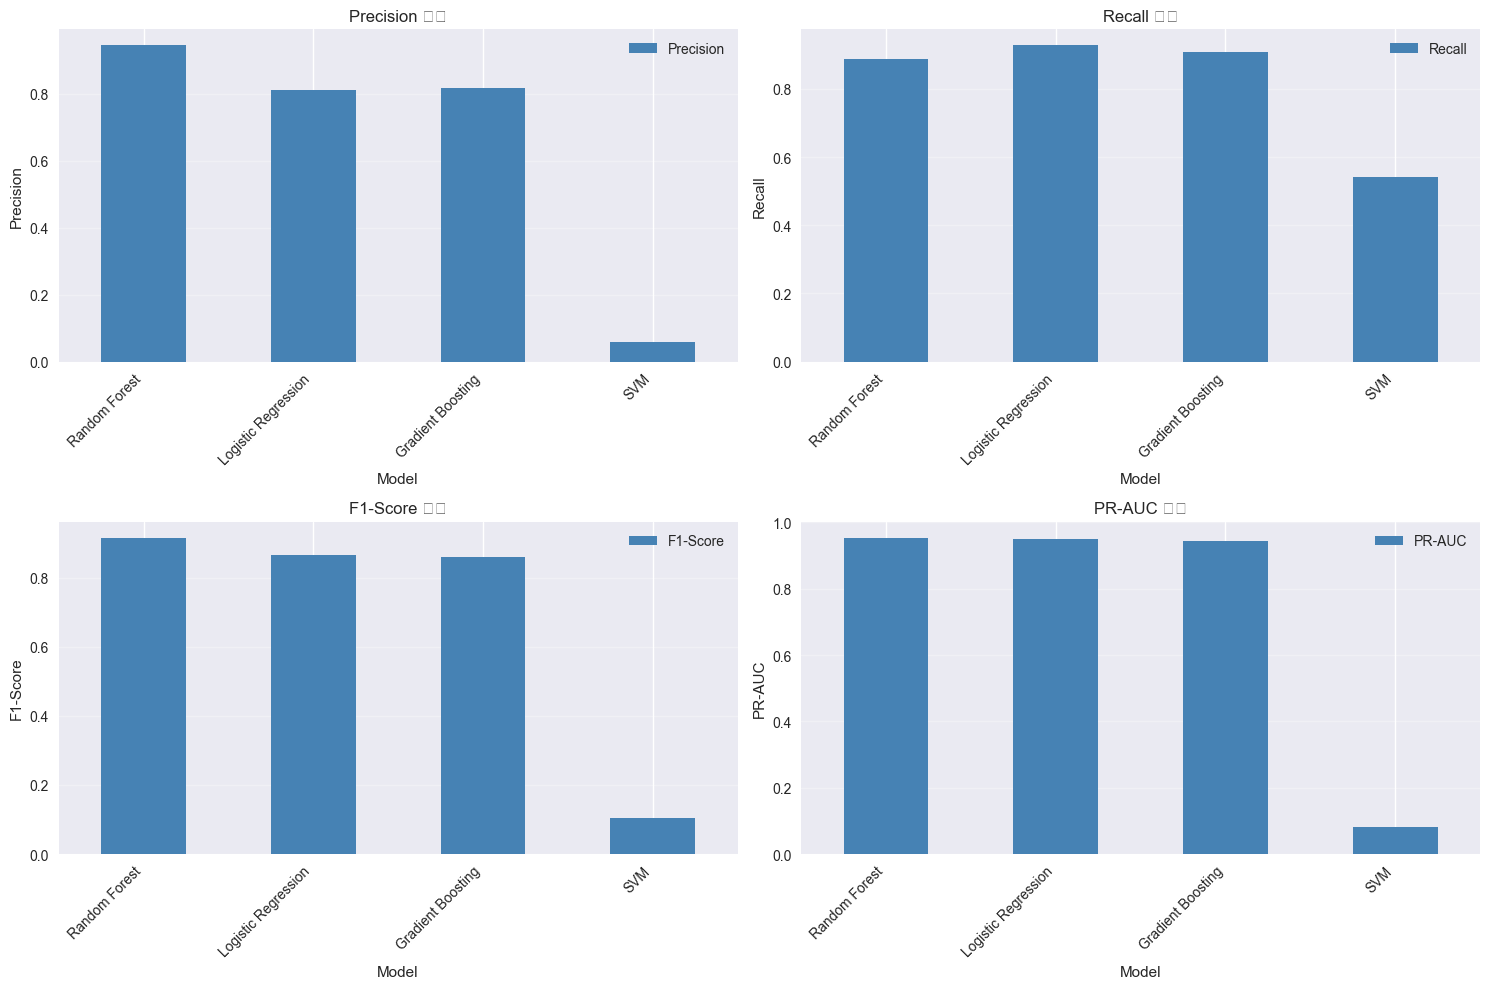

In [39]:
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1'] for m in results.keys()],
    'PR-AUC': [results[m]['pr_auc'] for m in results.keys()]
})
comparison_df = comparison_df.sort_values('F1-Score', ascending=False)
print(comparison_df.to_string(index=False))

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

metrics = ['Precision', 'Recall', 'F1-Score', 'PR-AUC']
for idx, metric in enumerate(metrics):
    comparison_df.plot(x='Model', y=metric, kind='bar', ax=axes[idx], color='steelblue')
    axes[idx].set_title(f'{metric} 비교')
    axes[idx].set_ylabel(metric)
    axes[idx].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [40]:
best_model_name = comparison_df.iloc[0]['Model']
print(f"선택된 모델: {best_model_name}")

if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [15, 20, 25],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    base_model = RandomForestClassifier(random_state=42)
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [5, 7],
        'learning_rate': [0.1, 0.2]
    }
    base_model = GradientBoostingClassifier(random_state=42)
elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }
    base_model = LogisticRegression(random_state=42, max_iter=1000)
else:
    param_grid = {}
    base_model = results[best_model_name]['model']

if param_grid:
    grid_search = GridSearchCV(
        base_model, 
        param_grid, 
        cv=3,
        scoring='f1', 
        n_jobs=-1, 
        verbose=1
    )
    grid_search.fit(X_train_smote, y_train_smote)
    best_model = grid_search.best_estimator_
    print(f"최적 파라미터: {grid_search.best_params_}")
    print(f"최적 CV 점수: {grid_search.best_score_:.4f}")
else:
    best_model = results[best_model_name]['model']

선택된 모델: Random Forest
Fitting 3 folds for each of 24 candidates, totalling 72 fits
최적 파라미터: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
최적 CV 점수: 0.9932


목표 달성! 최적 threshold: 0.600
최적 threshold에서의 성능:
  Precision: 0.9770
  Recall: 0.8673
  F1-Score: 0.9189
  PR-AUC: 0.9533


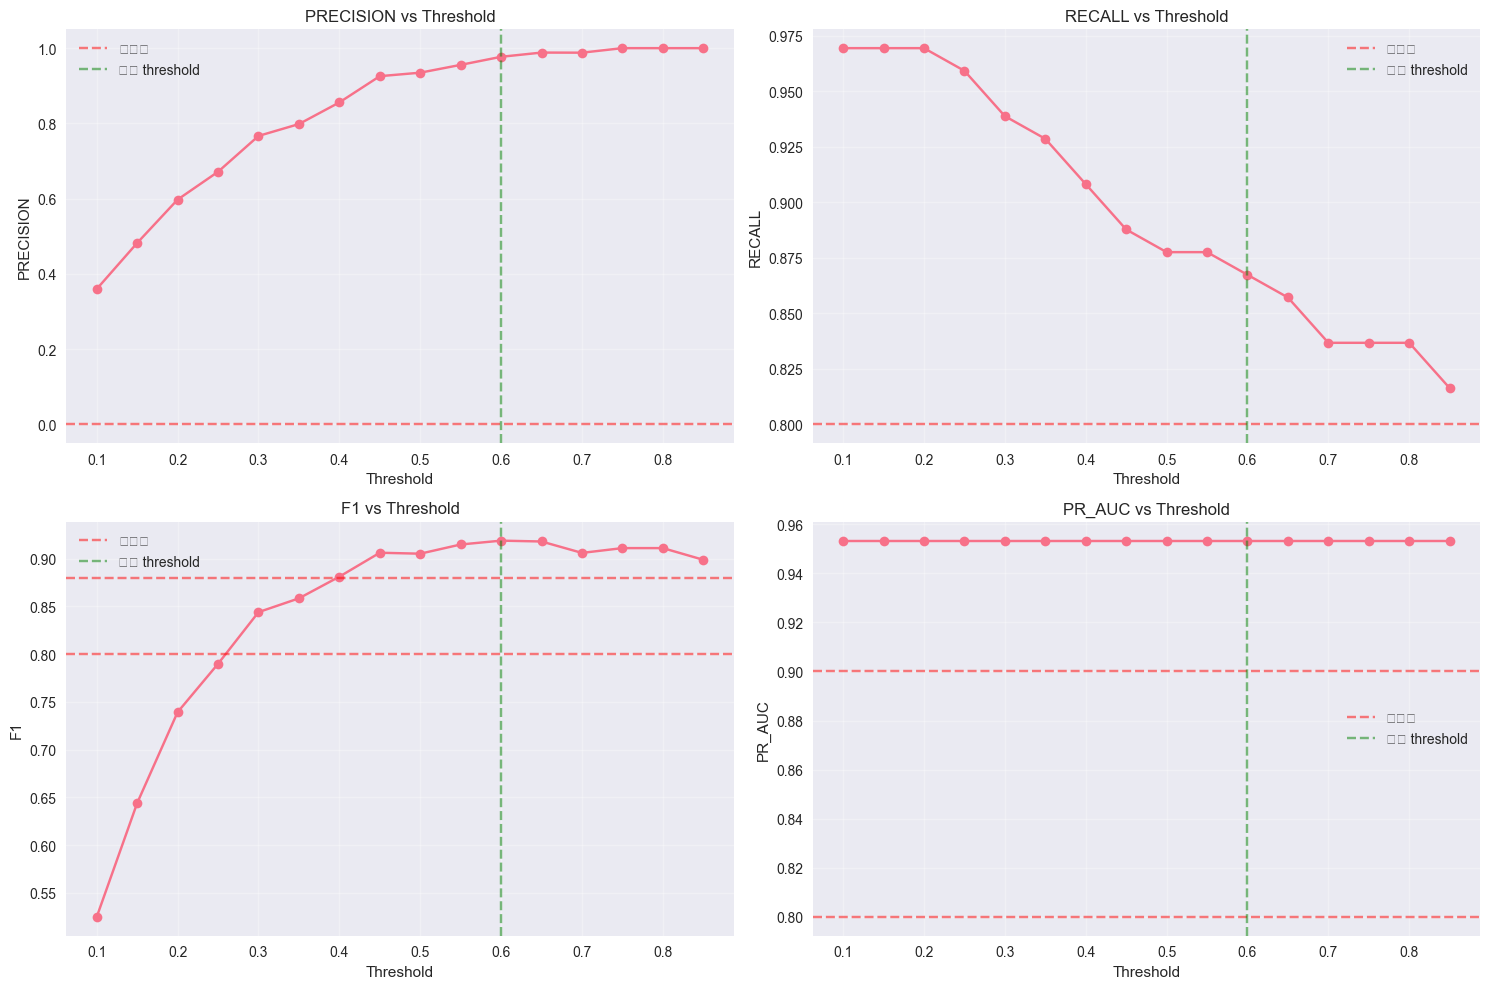

In [41]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.05)
threshold_results = []

for threshold in thresholds:
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    precision = precision_score(y_test, y_pred_thresh)
    pr_auc = average_precision_score(y_test, y_pred_proba)
    
    threshold_results.append({
        'threshold': threshold,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'pr_auc': pr_auc
    })

threshold_df = pd.DataFrame(threshold_results)

target_met = threshold_df[
    (threshold_df['recall'] >= 0.80) & 
    (threshold_df['f1'] >= 0.88) & 
    (threshold_df['pr_auc'] >= 0.90)
]

if len(target_met) > 0:
    best_threshold_row = target_met.loc[target_met['f1'].idxmax()]
    best_threshold = best_threshold_row['threshold']
    print(f"목표 달성! 최적 threshold: {best_threshold:.3f}")
else:
    best_threshold_row = threshold_df.loc[threshold_df['f1'].idxmax()]
    best_threshold = best_threshold_row['threshold']
    print(f"목표를 완전히 달성하지 못했습니다. 최적 threshold: {best_threshold:.3f}")

print(f"최적 threshold에서의 성능:")
print(f"  Precision: {best_threshold_row['precision']:.4f}")
print(f"  Recall: {best_threshold_row['recall']:.4f}")
print(f"  F1-Score: {best_threshold_row['f1']:.4f}")
print(f"  PR-AUC: {best_threshold_row['pr_auc']:.4f}")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

metrics = ['precision', 'recall', 'f1', 'pr_auc']
for idx, metric in enumerate(metrics):
    axes[idx].plot(threshold_df['threshold'], threshold_df[metric], marker='o')
    axes[idx].axhline(y=0.80 if metric != 'precision' else 0, color='r', linestyle='--', alpha=0.5, label='목표선')
    if metric == 'f1':
        axes[idx].axhline(y=0.88, color='r', linestyle='--', alpha=0.5)
    if metric == 'pr_auc':
        axes[idx].axhline(y=0.90, color='r', linestyle='--', alpha=0.5)
    axes[idx].axvline(x=best_threshold, color='g', linestyle='--', alpha=0.5, label='최적 threshold')
    axes[idx].set_xlabel('Threshold')
    axes[idx].set_ylabel(metric.upper())
    axes[idx].set_title(f'{metric.upper()} vs Threshold')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend()

plt.tight_layout()
plt.show()

최적 Threshold: 0.600
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2001
           1       0.98      0.87      0.92        98

    accuracy                           0.99      2099
   macro avg       0.99      0.93      0.96      2099
weighted avg       0.99      0.99      0.99      2099

PR-AUC: 0.9533
Confusion Matrix:
[[1999    2]
 [  13   85]]

목표: Recall ≥ 0.80, F1 ≥ 0.88, PR-AUC ≥ 0.90
실제 성능:
  Precision: 0.9770
  Recall: 0.8673 ✓
  F1-Score: 0.9189 ✓
  PR-AUC: 0.9533 ✓
✓ 모든 목표를 달성했습니다!

Class 0 (정상 거래): Precision=0.9935, Recall=0.9990, F1=0.9963
Class 1 (사기 거래): Precision=0.9770, Recall=0.8673, F1=0.9189


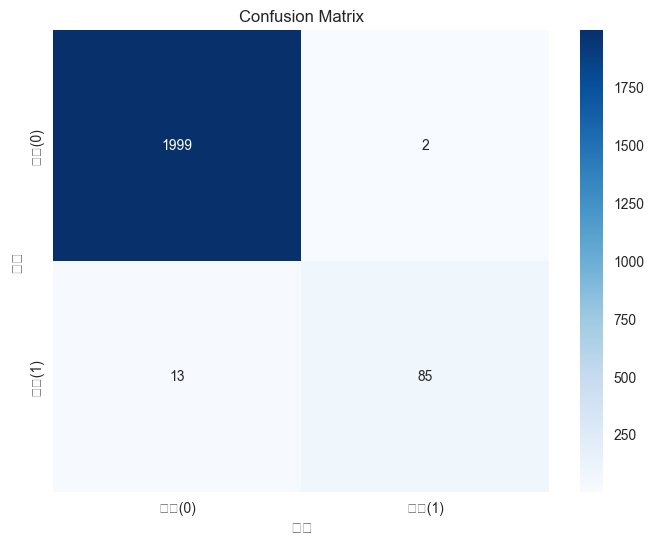

In [ ]:
y_pred_final = (y_pred_proba >= best_threshold).astype(int)

print(f"최적 Threshold: {best_threshold:.3f}")
print(classification_report(y_test, y_pred_final))

pr_auc_final = average_precision_score(y_test, y_pred_proba)
print(f"PR-AUC: {pr_auc_final:.4f}")

cm = confusion_matrix(y_test, y_pred_final)
print(f"Confusion Matrix:\n{cm}")

final_recall = recall_score(y_test, y_pred_final)
final_f1 = f1_score(y_test, y_pred_final)
final_precision = precision_score(y_test, y_pred_final)

print(f"\n목표: Recall ≥ 0.80, F1 ≥ 0.88, PR-AUC ≥ 0.90")
print(f"실제 성능:")
print(f"  Precision: {final_precision:.4f}")
print(f"  Recall: {final_recall:.4f} {'✓' if final_recall >= 0.80 else '✗'}")
print(f"  F1-Score: {final_f1:.4f} {'✓' if final_f1 >= 0.88 else '✗'}")
print(f"  PR-AUC: {pr_auc_final:.4f} {'✓' if pr_auc_final >= 0.90 else '✗'}")

if final_recall >= 0.80 and final_f1 >= 0.88 and pr_auc_final >= 0.90:
    print("✓ 모든 목표를 달성했습니다!")
else:
    print("✗ 일부 목표를 달성하지 못했습니다.")
    
report_dict = classification_report(y_test, y_pred_final, output_dict=True)
print(f"\nClass 0 (정상 거래): Precision={report_dict['0']['precision']:.4f}, Recall={report_dict['0']['recall']:.4f}, F1={report_dict['0']['f1-score']:.4f}")
print(f"Class 1 (사기 거래): Precision={report_dict['1']['precision']:.4f}, Recall={report_dict['1']['recall']:.4f}, F1={report_dict['1']['f1-score']:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['정상(0)', '사기(1)'], 
            yticklabels=['정상(0)', '사기(1)'])
plt.title('Confusion Matrix')
plt.ylabel('실제')
plt.xlabel('예측')
plt.show()

print("\n추가 개선 방법 제안:")
print("목표를 달성했지만, 더 높은 성능을 위해 다음 방법들을 시도할 수 있습니다:")
print("1. 앙상블 기법: Voting, Stacking 등")
print("2. 다른 오버샘플링 기법: ADASYN, Borderline-SMOTE 등")
print("3. 특성 엔지니어링: 새로운 특성 생성, 특성 선택")
print("4. Cost-sensitive Learning: 클래스 가중치 조정")